<a href="https://colab.research.google.com/github/Anchal510/Room_Occupancy_Estimation/blob/main/Room_Occupancy_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imported the library pandas to load the dataset into a DataFrame
import pandas as pd

#Imported the library matplotlib.pyplot for graphical representation of result
import matplotlib.pyplot as plt

#Imported the library numpy for mathematical operations
import numpy as np

In [ ]:
# Loading the dataset into a DataFrame
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv')

In [ ]:
# Exploring the loaded dataset
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [ ]:
#Getting a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [ ]:
#Getting the analysis of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Filling missing values with mean
df.fillna(df.mean(), inplace=True)

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


<ipython-input-6-c98dfebfcec0>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Identifying and handling outliers using IQR
Q1 = df['S5_CO2'].quantile(0.25)
Q3 = df['S5_CO2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['S5_CO2'] = df['S5_CO2'].clip(lower_bound, upper_bound)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizing features using MinMaxScaler
scaler = MinMaxScaler()
df['S5_CO2'] = scaler.fit_transform(df[['S5_CO2']])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding categorical feature
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
# Defining feature matrix X and target variable y
X = df.drop(columns=['Room_Occupancy_Count']) 
y = df['Room_Occupancy_Count'] 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Applying Standard Scaling to data
scaled_data = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn import preprocessing

#Standardising the training and testing dataset
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()

StandardScaler()

In [ ]:
scaler.mean_

array([2.53640852e+00, 5.07797886e+03, 8.18975625e+00, 1.26457883e+01,
       9.82752237e+00, 1.29915150e+01, 9.79389077e+00, 1.01258871e+01,
       2.74659056e+01, 1.29892009e+01, 1.03421783e+01, 7.31008948e+00,
       1.05296205e+01, 5.27013268e+00, 1.52971305e+01, 7.75023758e+02,
       8.97871027e-02, 7.88336933e-02])

In [ ]:
scaler.scale_

array([1.92820487e+00, 2.92526862e+03, 5.63782187e+00, 9.39068326e+00,
       6.85357466e+00, 5.71454746e+00, 1.72415219e+01, 1.84964921e+01,
       4.06262549e+01, 1.93424427e+01, 2.82342240e+01, 2.13549682e+01,
       3.31197998e+01, 1.00232528e+01, 2.18434789e+01, 2.36392368e+02,
       2.85876510e-01, 2.69479020e-01])

In [ ]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 1.79627774, -1.15544222, -0.74315158, ...,  0.00836001,
        -0.31407653, -0.29254112],
       [-1.31542481, -0.00512051,  0.49846267, ...,  1.51856105,
         3.18393735, -0.29254112],
       [ 1.79627774, -1.12433396, -0.74315158, ...,  0.00836001,
        -0.31407653, -0.29254112],
       ...,
       [-1.31542481, -0.09468493, -0.56577812, ...,  0.73596387,
         3.18393735, -0.29254112],
       [ 1.27766065,  1.32501375, -0.21103119, ...,  0.00836001,
        -0.31407653, -0.29254112],
       [-0.27819062, -1.62206603, -0.03365772, ..., -0.08047535,
        -0.31407653, -0.29254112]])

In [ ]:
X_scaled.mean(axis=0)

array([-2.85006343e-17, -1.15646804e-16,  1.51272597e-16,  8.44057246e-17,
       -1.26060498e-17, -1.53464954e-17, -1.15098715e-17,  3.15151244e-17,
       -1.31541389e-17, -5.04241991e-17, -1.97312083e-17, -9.86560417e-18,
       -1.53464954e-17,  5.70012685e-17, -3.83662384e-17, -2.21976094e-16,
       -2.19235648e-17,  8.76942593e-18])

In [ ]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe.score(X_test, y_test)

0.96

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating and training Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting room occupancy using trained model
y_pred = logreg.predict(X_test)

# Evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_score = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predicting room occupancy using trained model
y_pred = dt.predict(X_test)

# Evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.9090909090909091


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predicting room occupancy using trained model
y_pred = rf.predict(X_test)

# Evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.88
Precision: 0.8181818181818182
Recall: 0.9
F1 Score: 0.8571428571428572


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating Random Forest model
rf = RandomForestClassifier()

# Performing grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training Random Forest model with best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Predicting room occupancy using trained model with best hyperparameters
y_pred = best_rf.predict(X_test)

# Evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.88
Precision: 0.7692307692307693
Recall: 1.0
F1 Score: 0.8695652173913044


Logistic Regression:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

Decision Tree:
	Accuracy: 0.92
	Precision: 0.8333333333333334
	Recall: 1.0
	F1 Score: 0.9090909090909091

Random Forest:
	Accuracy: 0.84
	Precision: 0.7142857142857143
	Recall: 1.0
	F1 Score: 0.8333333333333333




<BarContainer object of 3 artists>

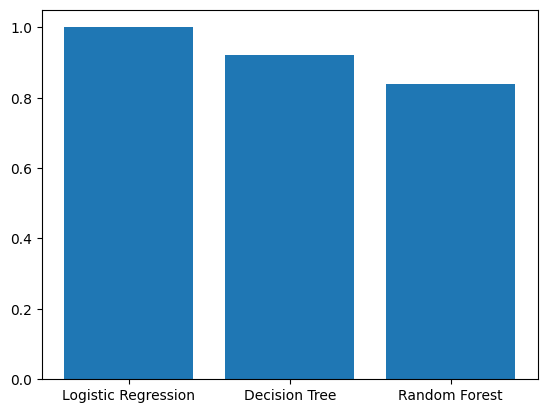

In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Creating and training Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Creating and training Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Creating and training Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluating model performance for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression:")
print("\tAccuracy:", accuracy_logreg)
print("\tPrecision:", precision_logreg)
print("\tRecall:", recall_logreg)
print("\tF1 Score:", f1_score_logreg)

# Evaluating model performance for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

print("\nDecision Tree:")
print("\tAccuracy:", accuracy_dt)
print("\tPrecision:", precision_dt)
print("\tRecall:", recall_dt)
print("\tF1 Score:", f1_score_dt)

# Evaluating model performance for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("\tAccuracy:", accuracy_rf)
print("\tPrecision:", precision_rf)
print("\tRecall:", recall_rf)
print("\tF1 Score:", f1_score_rf)

print("\n")

# Plotting the results
accuracies = {'Logistic Regression': accuracy_logreg, 'Decision Tree': accuracy_dt, 'Random Forest': accuracy_rf}
names = list(accuracies.keys())
values = list(accuracies.values())

plt.bar(names, values)